<a href="https://colab.research.google.com/github/Surya23-15/CloudQA/blob/main/Predicting_California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv')
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [9]:
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [11]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [12]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [13]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [14]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                     'total_bedrooms',	'population',
                                     'households',	'median_income',
                                     '<1H OCEAN',
                                     'INLAND',	'ISLAND',
                                     'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [15]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [16]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [17]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [19]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [21]:
X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed

array([[59.96496514826071, -17.023460199956013, -2.215747728487858, ...,
        False, False, False],
       [59.61139845769864, -16.427508204111714, -2.2283994701585708, ...,
        False, False, False],
       [58.95406320200578, -16.219363205563155, -2.171466632640363, ...,
        False, True, False],
       ...,
       [59.95998533571758, -17.02126919997129, -2.3296134035242733, ...,
        False, False, False],
       [60.226405306774915, -17.02126919997129, -2.2094218576525013, ...,
        False, False, False],
       [60.1243191496408, -17.119864199283768, -2.3296134035242733, ...,
        False, False, False]], dtype=object)

In [22]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,59.964965,-17.02346,-2.215748,-1.211817,-1.280134,-1.25664,-1.310613,-2.206508,True,False,False,False,False
1,59.611398,-16.427508,-2.228399,-1.211949,-1.281354,-1.256613,-1.311898,-2.557774,False,True,False,False,False
2,58.954063,-16.219363,-2.171467,-1.212027,-1.281604,-1.256308,-1.312118,-1.995683,False,False,False,True,False
3,58.988922,-16.201835,-2.133511,-1.21234,-1.283386,-1.257349,-1.314321,-2.684181,False,False,False,True,False
4,60.022233,-17.076044,-2.228399,-1.212088,-1.282291,-1.25695,-1.312968,-1.673505,True,False,False,False,False


<Axes: >

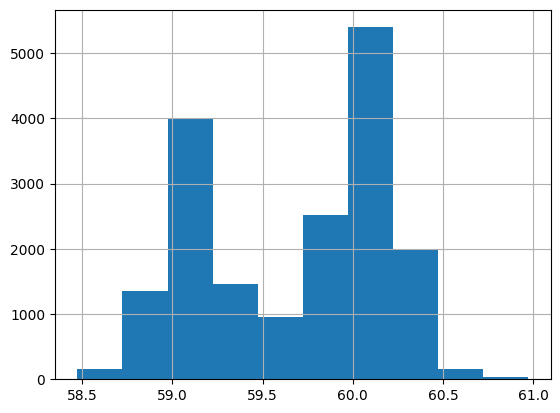

In [23]:
pd.DataFrame(X_train_preprocessed)[0].hist()

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)

rmse_train = np.sqrt(mse(y_train, lm.predict(X_train)))
rmse_val = np.sqrt(mse(y_val, lm.predict(X_val)))

print(rmse_train, rmse_val)

68593.05578127236 71382.43558330165


In [35]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
np.sqrt(mse(knn.predict(X_train), y_train)), np.sqrt(mse(knn.predict(X_val), y_val))

(np.float64(53759.09908812057), np.float64(62161.22860469906))

In [36]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
np.sqrt(mse(rfr.predict(X_train), y_train)), np.sqrt(mse(rfr.predict(X_val), y_val))

(np.float64(43474.672089843196), np.float64(53439.85414140131))

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
np.sqrt(mse(gbr.predict(X_train), y_train)), np.sqrt(mse(gbr.predict(X_val), y_val))

(np.float64(47274.822590721575), np.float64(51403.78381978612))

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')
# --------------------------------------------------------

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn.keras', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 54083661824.0000 - root_mean_squared_error: 232530.1406 - val_loss: 41779511296.0000 - val_root_mean_squared_error: 204400.3750
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 34547560448.0000 - root_mean_squared_error: 185621.9844 - val_loss: 18247022592.0000 - val_root_mean_squared_error: 135081.5469
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14363543552.0000 - root_mean_squared_error: 119696.2969 - val_loss: 9090519040.0000 - val_root_mean_squared_error: 95344.2109
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7984898048.0000 - root_mean_squared_error: 89344.7578 - val_loss: 7008851456.0000 - val_root_mean_squared_error: 83718.8828
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 6528547840.0000 - root_mean_squared_error: 80785.3438 - val_loss: 6081806848.0000 - val_root_mean_squared_error: 77985.9375
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 5532

In [41]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import mean_squared_error as mse

simple_nn = load_model('models/simple_nn.keras')

np.sqrt(mse(simple_nn.predict(X_train), y_train)), np.sqrt(mse(simple_nn.predict(X_val), y_val))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(np.float64(65162.99907155901), np.float64(67557.36217467346))

In [42]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32, 'relu'))
medium_nn.add(Dense(16, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn.keras', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18339248128.0000 - root_mean_squared_error: 129292.1250 - val_loss: 4816226816.0000 - val_root_mean_squared_error: 69399.0391
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4644489216.0000 - root_mean_squared_error: 68126.9531 - val_loss: 4808357888.0000 - val_root_mean_squared_error: 69342.3203
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4367041536.0000 - root_mean_squared_error: 66073.3281 - val_loss: 4597522944.0000 - val_root_mean_squared_error: 67805.0391
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4350509568.0000 - root_mean_squared_error: 65953.1562 - val_loss: 4528036864.0000 - val_root_mean_squared_error: 67290.6875
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4296316928.0000 - root_mean_squared_error: 65533.7656 - val_loss: 4756675072.0000 - val_root_mean_squared_error: 68968.6562
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4294410752.0

In [44]:
from tensorflow.keras.models import load_model
import numpy as np
medium_nn = load_model('models/medium_nn.keras')

np.sqrt(mse(medium_nn.predict(X_train), y_train)), np.sqrt(mse(medium_nn.predict(X_val), y_val))

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(np.float64(52806.17418446445), np.float64(56029.519077000834))

In [45]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn.keras', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 10713672704.0000 - root_mean_squared_error: 99908.8594 - val_loss: 4982193664.0000 - val_root_mean_squared_error: 70584.6562
Epoch 2/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5241320960.0000 - root_mean_squared_error: 72318.1953 - val_loss: 5974941696.0000 - val_root_mean_squared_error: 77297.7500
Epoch 3/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 4294680320.0000 - root_mean_squared_error: 65516.0742 - val_loss: 4853336576.0000 - val_root_mean_squared_error: 69665.8906
Epoch 4/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4018917376.0000 - root_mean_squared_error: 63385.3750 - val_loss: 4749633024.0000 - val_root_mean_squared_error: 68917.5781
Epoch 5/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3809330688.0000 - root_mean_squared_error: 61712.6562 - val_loss: 4598385664.0000 - val_root_mean_squared_error: 67811.3984
Epoch 6/100
563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3936141824.00

In [47]:
from tensorflow.keras.models import load_model
import numpy as np

large_nn = load_model('models/large_nn.keras')

np.sqrt(mse(large_nn.predict(X_train), y_train)), np.sqrt(mse(large_nn.predict(X_val), y_val))

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


(np.float64(46571.454261167324), np.float64(52557.927508607114))

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error as mse

np.sqrt(mse(gbr.predict(X_test), y_test))

np.float64(49302.987533152365)

In [51]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, gbr.predict(X_test))

49302.987533152365